In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split



In [11]:
data = pd.read_csv('/content/housing.csv')

In [12]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
data.dropna(inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [19]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [20]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

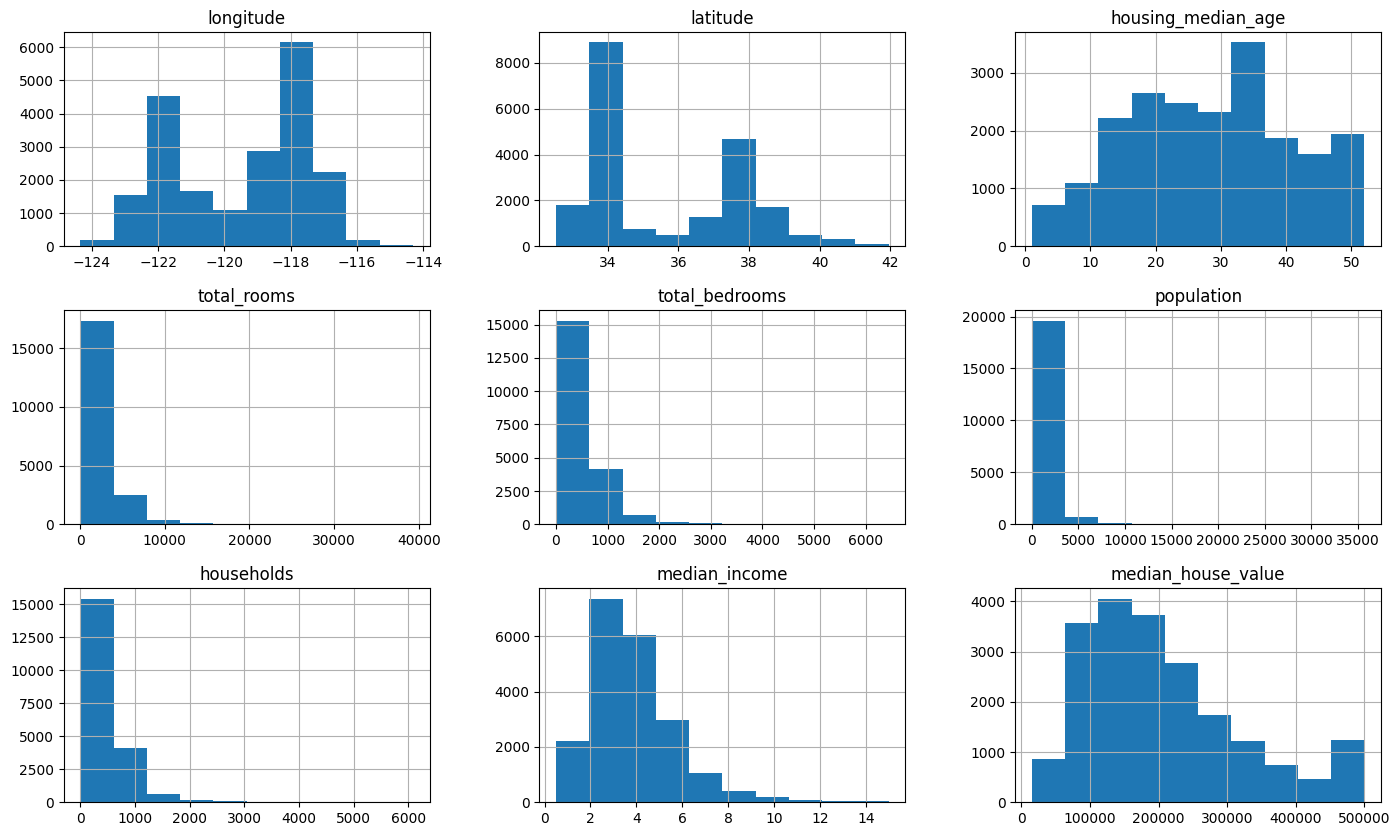

In [23]:
data.hist(figsize=(17,10))

<ipython-input-27-e5782fbc4523>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

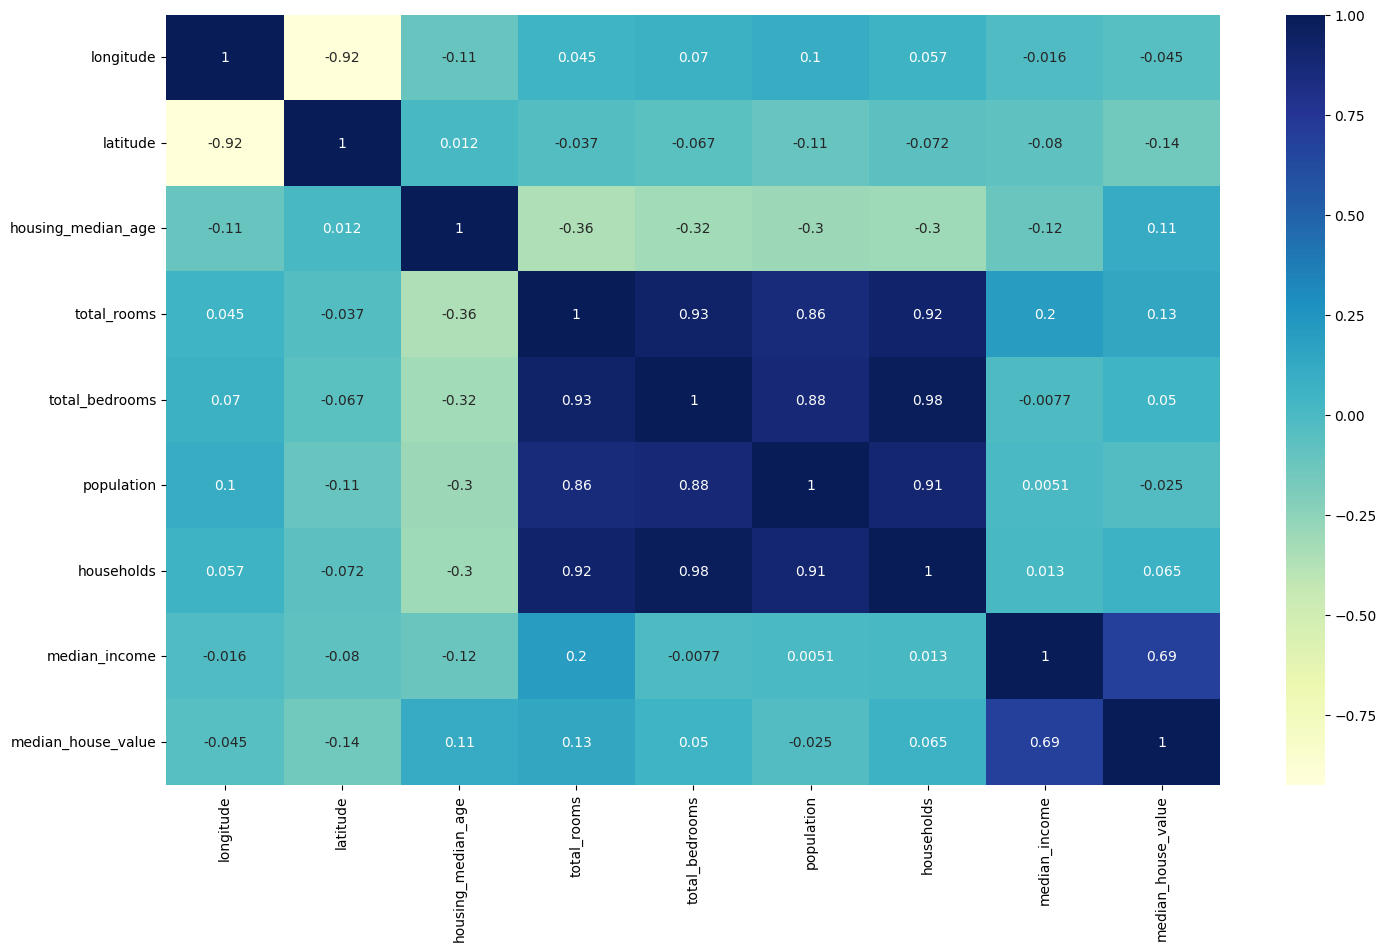

In [27]:
plt.figure(figsize=(17,10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [29]:
data['total_rooms']= np.log(data['total_rooms']+1)
data['total_bedrooms']= np.log(data['total_bedrooms']+1)
data['total_rooms']= np.log(data['total_rooms']+1)
data['population']= np.log(data['population']+1)
data['households']= np.log(data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

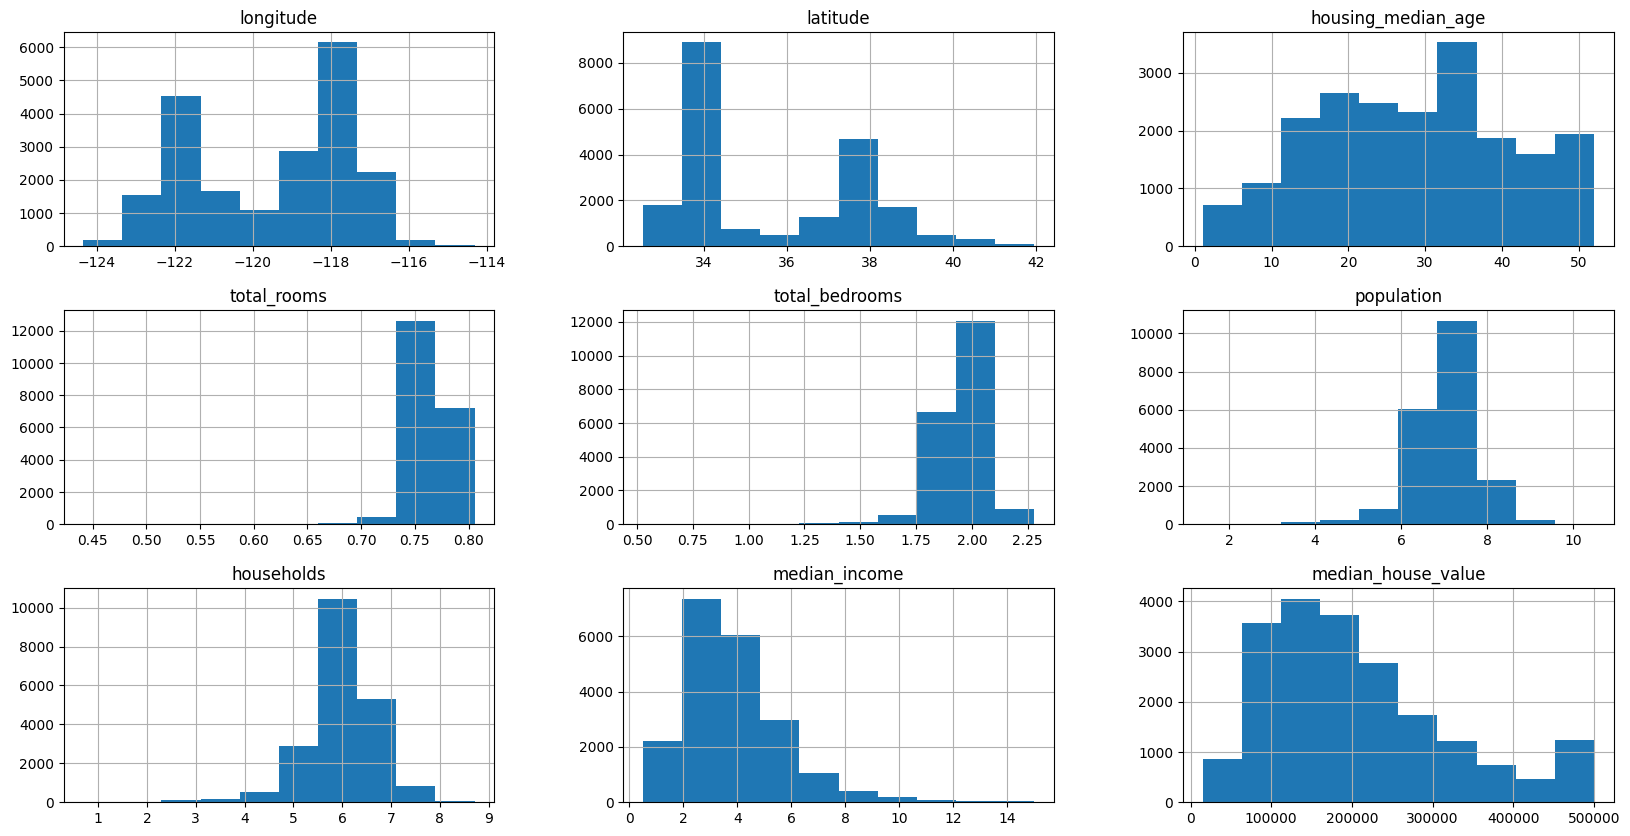

In [30]:
data.hist(figsize=(20,10))

In [31]:
data.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [35]:
data = data.join( pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,0.749384,1.769435,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,0.784207,2.080617,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,0.759080,1.832945,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,0.756493,1.866222,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,0.760937,1.892864,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,0.761347,1.935416,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,0.744644,1.794635,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,0.766575,1.972164,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,0.763290,1.948216,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0


<Axes: >

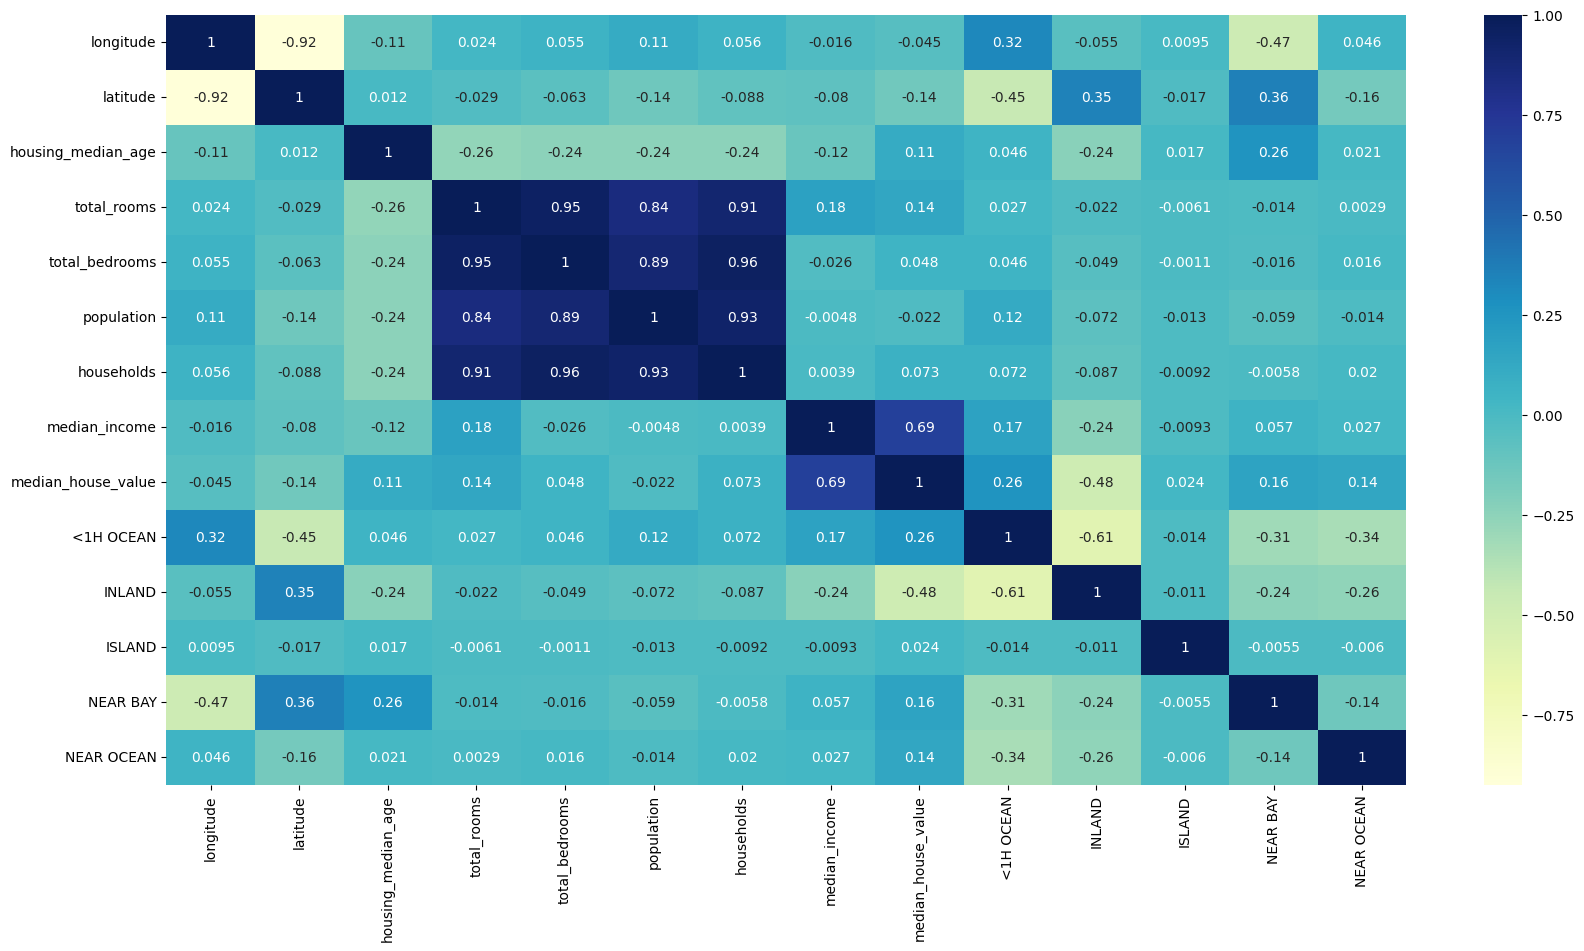

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

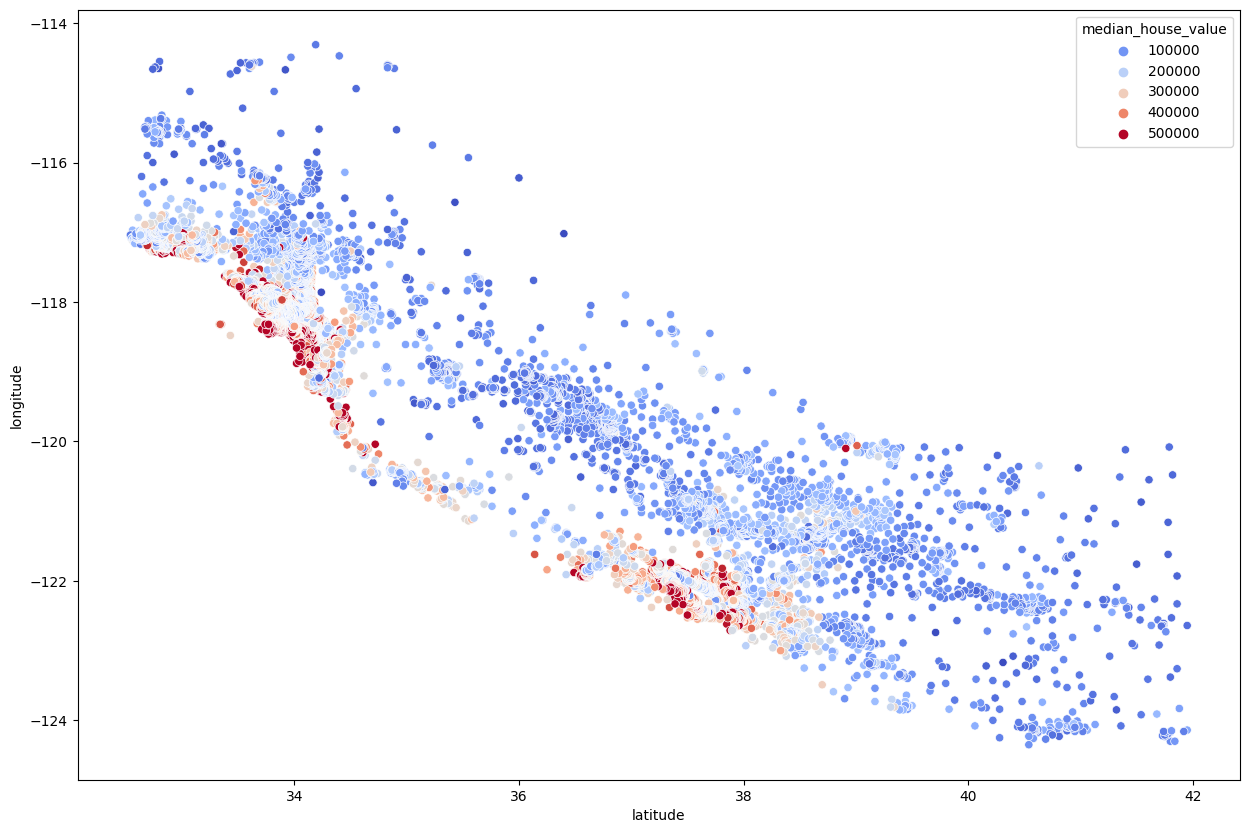

In [40]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='latitude', y ="longitude", data = data, hue='median_house_value', palette='coolwarm')

In [43]:

data['bedroom_ratio']= data['total_bedrooms'] / data['total_rooms']
data['household_rooms'] = data['total_rooms'] / data['households']

<Axes: >

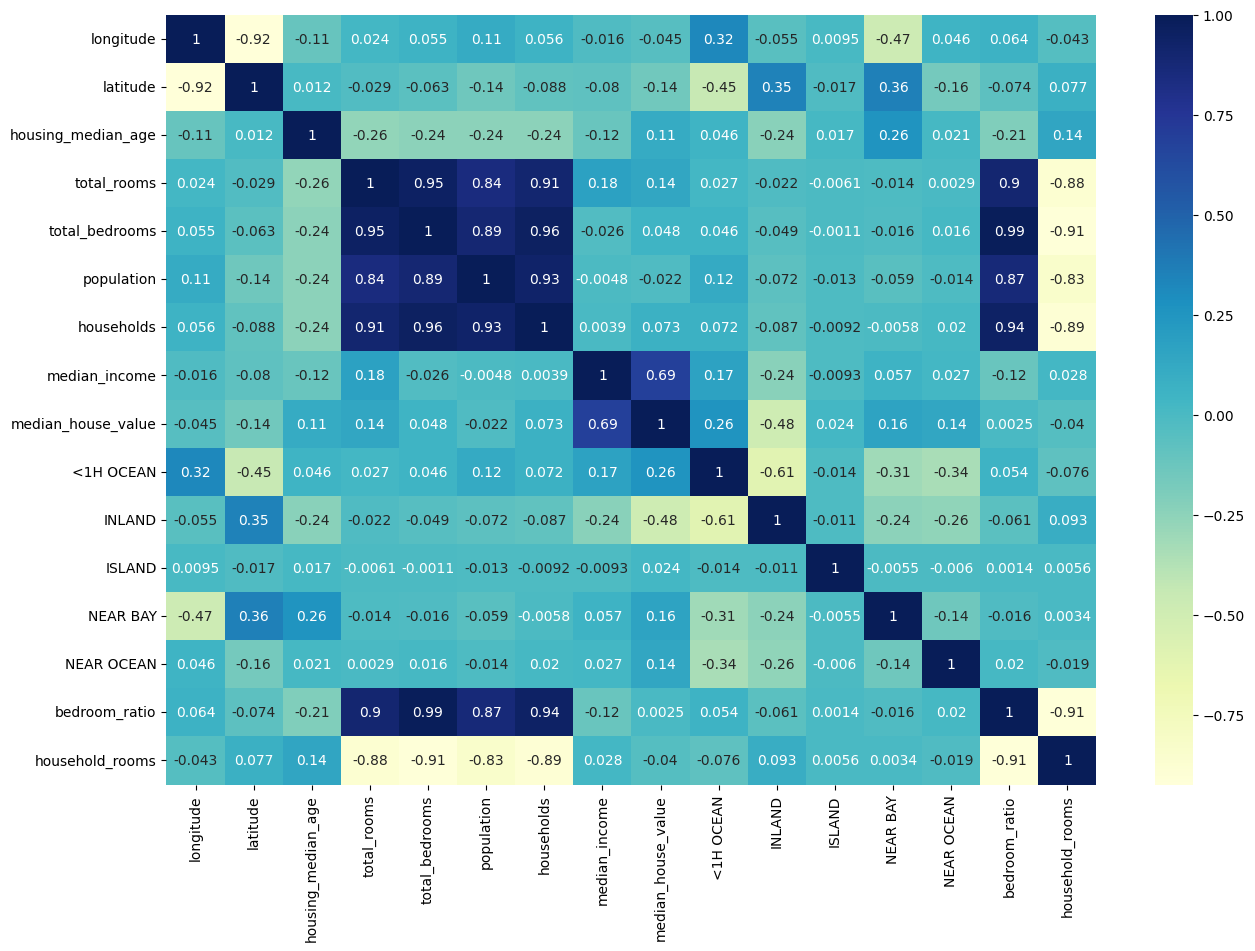

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

In [48]:
X=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [50]:
reg.fit(X_train, y_train)

LinearRegression()

In [51]:
reg.score(X_test, y_test)

0.6677536761406835

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [55]:
X_train_s = scaler.fit_transform(X_train)

In [56]:
reg.fit(X_train_s, y_train)

LinearRegression()

In [57]:
X_test_s= scaler.fit_transform(X_test)

In [58]:
reg.score(X_test_s, y_test)

0.6680256800791146

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rft = RandomForestRegressor()

In [71]:
rft.fit(X_train, y_train)

RandomForestRegressor()

In [72]:
rft.score(X_test, y_test)

0.824717369149873

In [70]:
from sklearn.model_selection import GridSearchCV

In [85]:
param_grid = {
    'n_estimators': [100,200],
    'min_samples_split':[2,4],
    'max_depth':[None, 4]
}
rft = RandomForestRegressor()
grb = GridSearchCV(rft, param_grid, cv=5,
                   scoring="neg_mean_squared_error",
                   return_train_score=True)

grb.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [87]:
best_forest = grb.best_estimator_

In [88]:
best_forest.score(X_test, y_test)

0.8253741397094638